In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip '/content/drive/MyDrive/Colab Notebooks/Animal_Dataset.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/Animal_Dataset.zip
   creating: dataset/
   creating: dataset/Testing/
   creating: dataset/Testing/bears/
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears

In [6]:
# Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))

In [8]:
train = train_gen.flow_from_directory('/content/dataset/Training',
                                      target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/dataset/Testing',
                                    target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)

Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [9]:
train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

In [10]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [11]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
155/155 [==============================] - 13s 82ms/step - loss: 1.1059 - accuracy: 0.5420 - val_loss: 0.6793 - val_accuracy: 0.7975
Epoch 2/10
155/155 [==============================] - 12s 77ms/step - loss: 0.5787 - accuracy: 0.8029 - val_loss: 0.3861 - val_accuracy: 0.8681
Epoch 3/10
155/155 [==============================] - 12s 79ms/step - loss: 0.3341 - accuracy: 0.8974 - val_loss: 0.1556 - val_accuracy: 0.9755
Epoch 4/10
155/155 [==============================] - 12s 77ms/step - loss: 0.2159 - accuracy: 0.9435 - val_loss: 0.1046 - val_accuracy: 0.9877
Epoch 5/10
155/155 [==============================] - 12s 80ms/step - loss: 0.1318 - accuracy: 0.9750 - val_loss: 0.1306 - val_accuracy: 0.9571
Epoch 6/10
155/155 [==============================] - 13s 82ms/step - loss: 0.0701 - accuracy: 0.9855 - val_loss: 0.0238 - val_accuracy: 0.9939
Epoch 7/10
155/155 [==============================] - 12s 79ms/step - loss: 0.0779 - accuracy: 0.9863 - val_loss: 0.0257 - val_accuracy:

In [14]:
model.save('animal.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
# Testing

import numpy as np
from tensorflow.keras.preprocessing import image

In [20]:
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/crow.jpeg',target_size=(120,120))

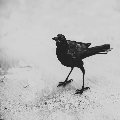

In [21]:
img

In [22]:
img = image.img_to_array(img)
img

array([[[158., 158., 158.],
        [164., 164., 164.],
        [170., 170., 170.],
        ...,
        [199., 199., 199.],
        [199., 199., 199.],
        [199., 199., 199.]],

       [[156., 156., 156.],
        [164., 164., 164.],
        [168., 168., 168.],
        ...,
        [200., 200., 200.],
        [199., 199., 199.],
        [199., 199., 199.]],

       [[159., 159., 159.],
        [165., 165., 165.],
        [169., 169., 169.],
        ...,
        [201., 201., 201.],
        [202., 202., 202.],
        [202., 202., 202.]],

       ...,

       [[116., 116., 116.],
        [190., 190., 190.],
        [184., 184., 184.],
        ...,
        [203., 203., 203.],
        [207., 207., 207.],
        [208., 208., 208.]],

       [[148., 148., 148.],
        [165., 165., 165.],
        [181., 181., 181.],
        ...,
        [201., 201., 201.],
        [206., 206., 206.],
        [206., 206., 206.]],

       [[ 71.,  71.,  71.],
        [ 50.,  50.,  50.],
        [110., 1

In [23]:
img = np.expand_dims(img,axis=0)
img

array([[[[158., 158., 158.],
         [164., 164., 164.],
         [170., 170., 170.],
         ...,
         [199., 199., 199.],
         [199., 199., 199.],
         [199., 199., 199.]],

        [[156., 156., 156.],
         [164., 164., 164.],
         [168., 168., 168.],
         ...,
         [200., 200., 200.],
         [199., 199., 199.],
         [199., 199., 199.]],

        [[159., 159., 159.],
         [165., 165., 165.],
         [169., 169., 169.],
         ...,
         [201., 201., 201.],
         [202., 202., 202.],
         [202., 202., 202.]],

        ...,

        [[116., 116., 116.],
         [190., 190., 190.],
         [184., 184., 184.],
         ...,
         [203., 203., 203.],
         [207., 207., 207.],
         [208., 208., 208.]],

        [[148., 148., 148.],
         [165., 165., 165.],
         [181., 181., 181.],
         ...,
         [201., 201., 201.],
         [206., 206., 206.],
         [206., 206., 206.]],

        [[ 71.,  71.,  71.],
       

In [24]:
np.argmax(model.predict(img))

1/1 [==============================] - 0s 77ms/step


3